In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('MoviePer.csv')

In [4]:
df.head()

,ProfDU,BudgetDUM,OWkedDum,user_rating,movie_length,Director Value,specialeffects,Producer Power,Star Power,Profitable,Performance,grossboxoffice,BudgetDU,estmated_budget,opening_weekend
0,1,1,1,3.6,93,2,2,2,2,YES,Mid,1433049,low,10000000,1771
1,0,1,1,6.2,85,1,2,1,1,NO,loss,83500,low,80000,3284
2,1,1,1,7.0,92,2,3,2,2,YES,Low,124720,low,5000000,4584
3,1,1,1,5.5,92,2,3,2,2,YES,Low,54020,low,450000,6722
4,1,1,1,6.0,103,3,3,2,1,YES,High,75078,low,14000000,9128


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProfDU           481 non-null    int64  
 1   BudgetDUM        481 non-null    int64  
 2   OWkedDum         481 non-null    int64  
 3   user_rating      481 non-null    float64
 4   movie_length     481 non-null    int64  
 5   Director Value   481 non-null    int64  
 6   specialeffects   481 non-null    int64  
 7   Producer Power   481 non-null    int64  
 8   Star Power       481 non-null    int64  
 9   Profitable       481 non-null    object 
 10  Performance      481 non-null    object 
 11  grossboxoffice   481 non-null    int64  
 12  BudgetDU         481 non-null    object 
 13  estmated_budget  481 non-null    int64  
 14  opening_weekend  481 non-null    int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 56.5+ KB


In [6]:
df.columns

Index(['ProfDU', 'BudgetDUM', 'OWkedDum', 'user_rating', 'movie_length',
       'Director Value', 'specialeffects', 'Producer Power', 'Star Power',
       'Profitable', 'Performance', 'grossboxoffice', 'BudgetDU',
       'estmated_budget', 'opening_weekend'],
      dtype='object')

In [21]:
numerical_columns = ['user_rating', 'movie_length', 'grossboxoffice','estmated_budget', 'opening_weekend']
categorical_columns = [col for col in df.columns if col not in numerical_columns]

In [22]:
# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column is of dtype 'object'
    if df[column].dtype == 'object':
        # Initialize LabelEncoder
        label_encoder = LabelEncoder()
        # Encode the values and replace them in the DataFrame
        df[column] = label_encoder.fit_transform(df[column])

# EDA 

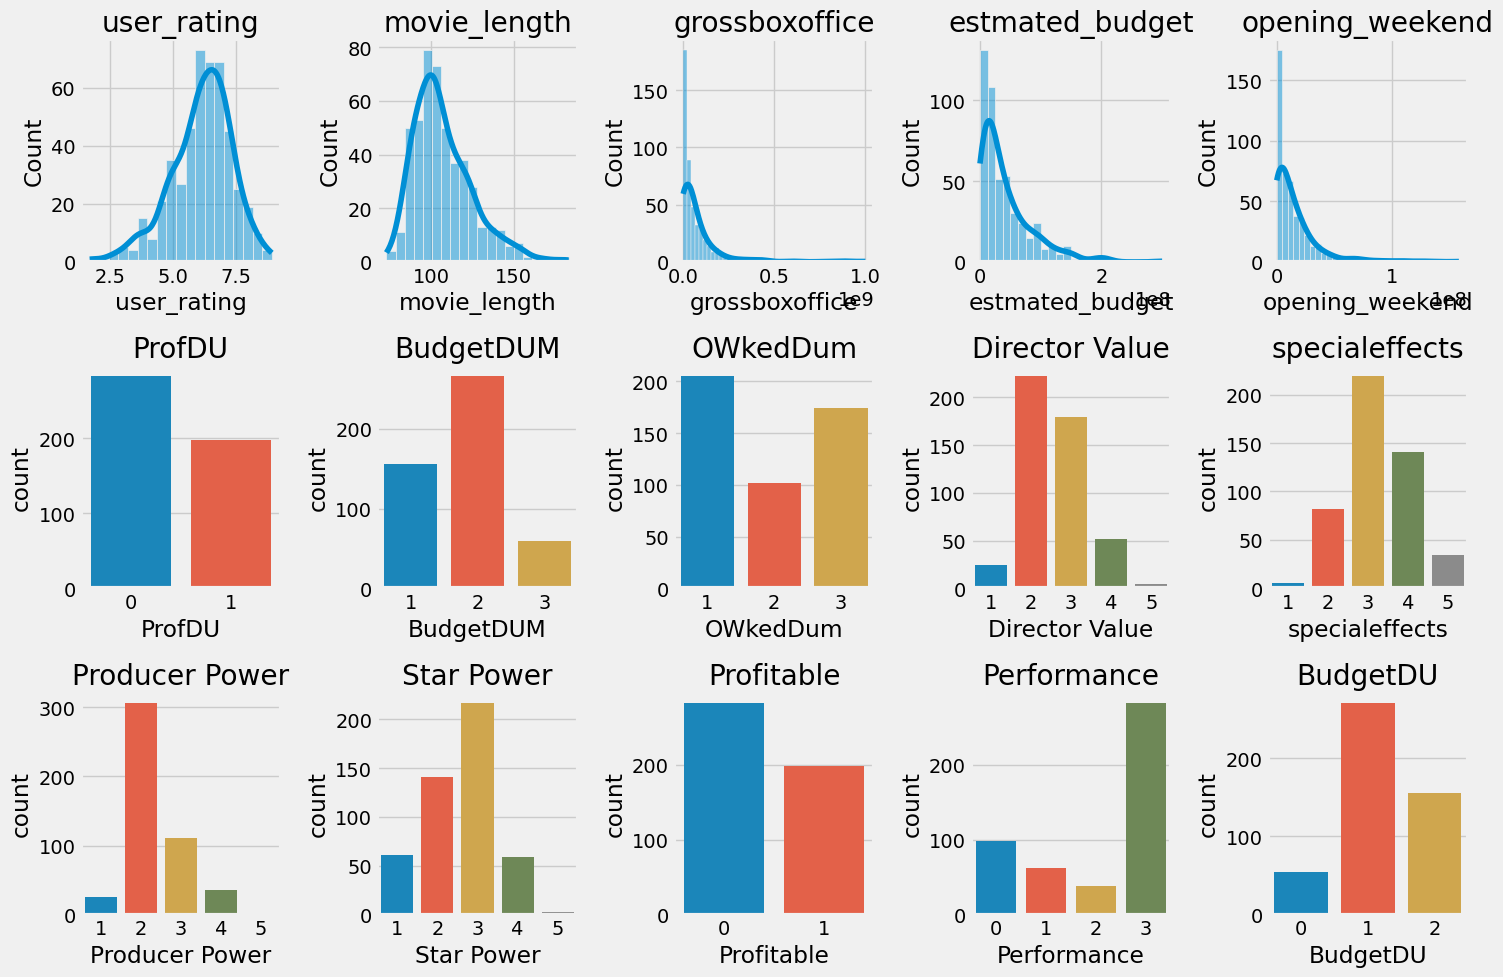

In [23]:
# Plotting subplots
num_rows = 3
num_cols = (len(numerical_columns) + len(categorical_columns) + num_rows - 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[column], ax=axes[row][col], kde=True)
    axes[row][col].set_title(column)

for i, column in enumerate(categorical_columns):
    row = (i + len(numerical_columns)) // num_cols
    col = (i + len(numerical_columns)) % num_cols
    sns.countplot(data=df, x=column, ax=axes[row][col])
    axes[row][col].set_title(column)

plt.tight_layout()
plt.show()

## Bivariate

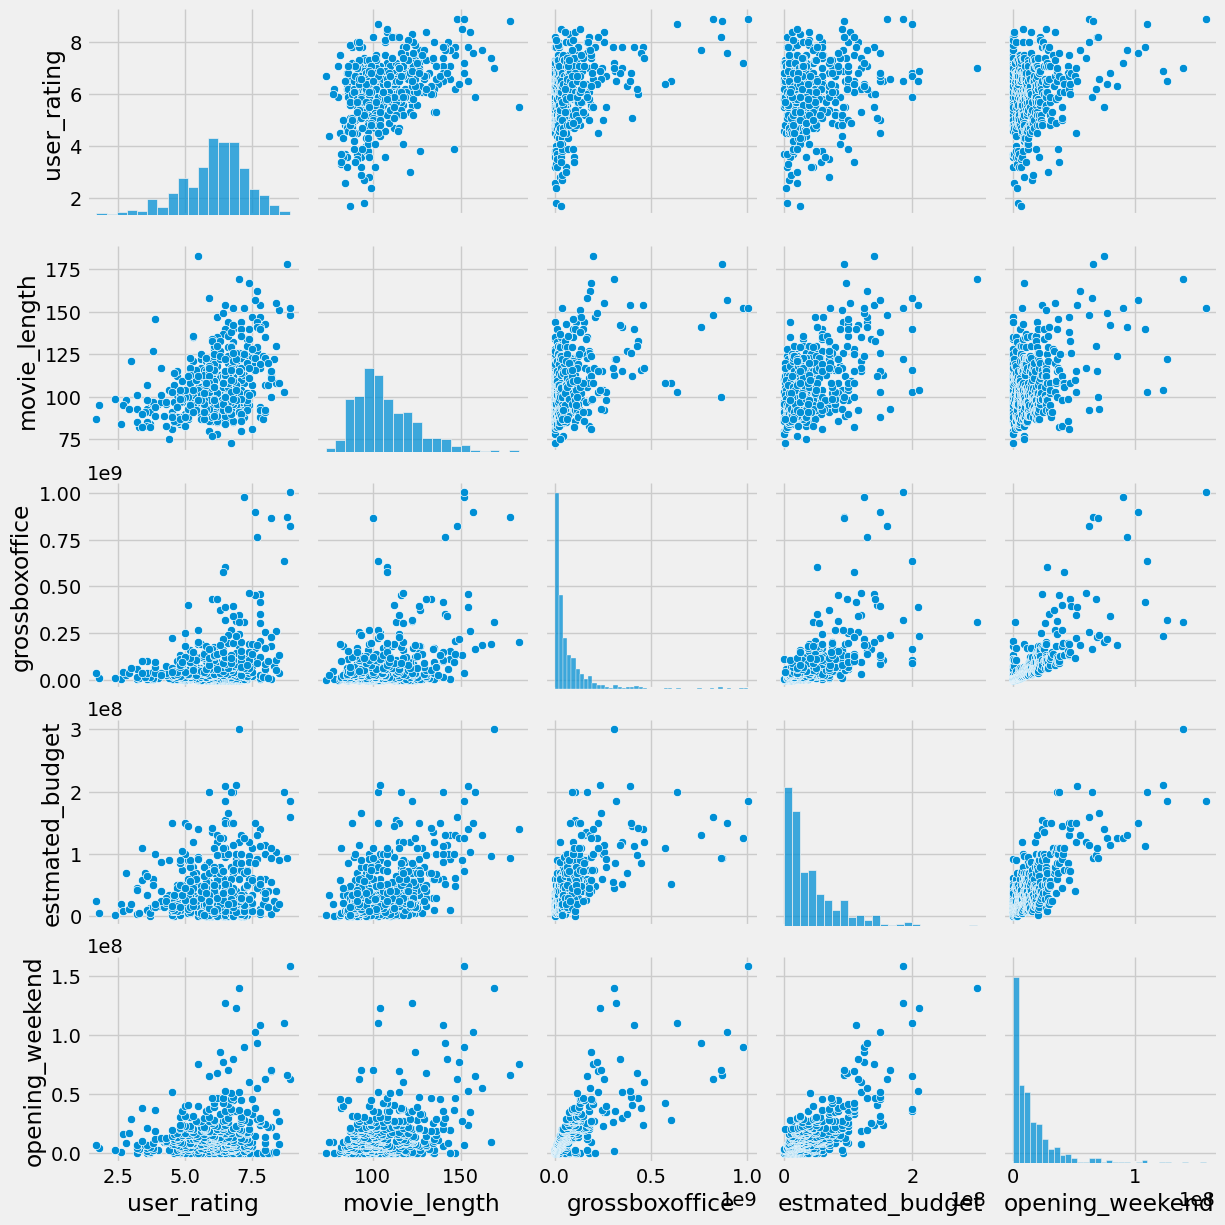

In [24]:
sns.pairplot(df[numerical_columns])

# Kmeans Clustering

In [25]:
#Determine the number of clusters 
inertia_t = []
for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(df)
    inertia_t.append(km.inertia_)

In [26]:
silhouette_scores = []

for i in range(2, 12):  # Considering clusters from 2 to 11
    km = KMeans(n_clusters=i)
    km.fit(df)
    silhouette_scores.append(silhouette_score(df, km.labels_))

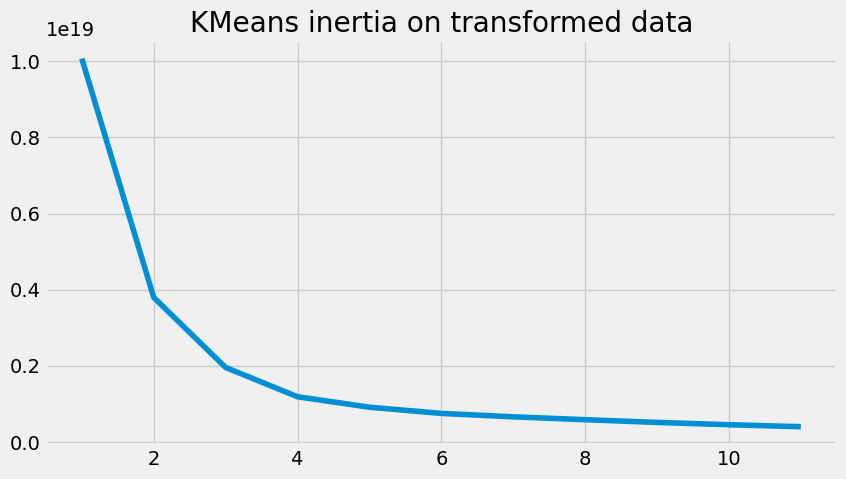

In [27]:
#Plot to check the suggested number of clusters
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.lineplot(x=range(1,12), y=inertia_t)
plt.title('KMeans inertia on transformed data')
plt.show()

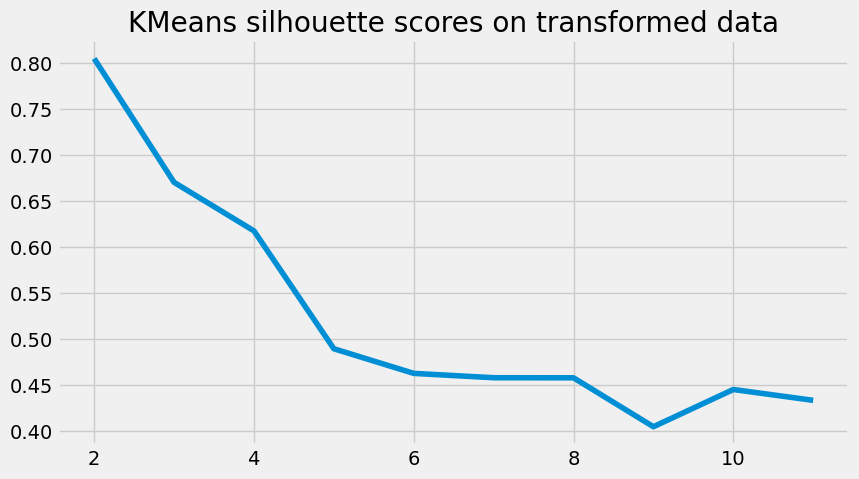

In [28]:
#Plot to check the suggested number of clusters
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.lineplot(x=range(2,12), y=silhouette_scores)
plt.title('KMeans silhouette scores on transformed data')
plt.show()

In [29]:
# We will chose number of cluster = 4

In [30]:
#Build the model
kmeans4=KMeans(n_clusters=4,n_init=10,max_iter=500)
kmeans4.fit(df)


KMeans(max_iter=500, n_clusters=4, n_init=10)

In [32]:
#Add the clusters into the initial dataframe (centers)
df['clusters']=kmeans4.labels_ 

# take a look at the cluster center
kmeans4.cluster_centers_

array([[ 5.09803922e-01,  1.57142857e+00,  1.61344538e+00,
         5.96610644e+00,  1.03226891e+02,  2.31372549e+00,
         3.02801120e+00,  2.20728291e+00,  2.29971989e+00,
         5.09803922e-01,  1.84593838e+00,  2.64512280e+07,
         1.43137255e+00,  2.38033389e+07,  7.13610547e+06],
       [-5.55111512e-17,  2.87500000e+00,  3.00000000e+00,
         8.25000000e+00,  1.41375000e+02,  3.87500000e+00,
         4.87500000e+00,  2.62500000e+00,  3.87500000e+00,
        -5.55111512e-17,  3.00000000e+00,  8.53361705e+08,
         2.50000000e-01,  1.42125000e+08,  9.42734392e+07],
       [ 1.11022302e-16,  2.65000000e+00,  2.90000000e+00,
         6.87000000e+00,  1.28300000e+02,  3.65000000e+00,
         4.10000000e+00,  3.25000000e+00,  3.80000000e+00,
         1.11022302e-16,  3.00000000e+00,  3.98566436e+08,
         4.00000000e-01,  1.19550000e+08,  5.42109740e+07],
       [ 1.66666667e-01,  2.37500000e+00,  2.84375000e+00,
         6.36145833e+00,  1.14583333e+02,  3.15625000

In [33]:
df.head()

,ProfDU,BudgetDUM,OWkedDum,user_rating,movie_length,Director Value,specialeffects,Producer Power,Star Power,Profitable,Performance,grossboxoffice,BudgetDU,estmated_budget,opening_weekend,clusters
0,1,1,1,3.6,93,2,2,2,2,1,2,1433049,2,10000000,1771,0
1,0,1,1,6.2,85,1,2,1,1,0,3,83500,2,80000,3284,0
2,1,1,1,7.0,92,2,3,2,2,1,1,124720,2,5000000,4584,0
3,1,1,1,5.5,92,2,3,2,2,1,1,54020,2,450000,6722,0
4,1,1,1,6.0,103,3,3,2,1,1,0,75078,2,14000000,9128,0


In [40]:
import plotly.express as px

# Assuming df is your DataFrame with the specified columns

fig = px.scatter_3d(df, x='estmated_budget', y='grossboxoffice', z='user_rating', color='clusters',
                    symbol='clusters', opacity=0.7, size_max=10,
                    title='3D Scatter Plot of Clusters', color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()


In [42]:
fig = px.scatter(df, x='estmated_budget', y='grossboxoffice', color='clusters',
                 symbol='clusters', opacity=0.7, size_max=10,
                 title='2D Scatter Plot of Clusters', color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [44]:
fig = px.scatter(df, x='grossboxoffice', y='user_rating', color='clusters',
                 symbol='clusters', opacity=0.7, size_max=10,
                 title='2D Scatter Plot of Clusters', color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()